[*********************100%%**********************]  1 of 1 completed


             Open        High         Low       Close   Adj Close  \
count  756.000000  756.000000  756.000000  756.000000  756.000000   
mean   130.231998  131.892775  128.614983  130.311812  128.403926   
std     30.596429   30.841435   30.287325   30.566496   30.605189   
min     57.020000   57.125000   53.152500   56.092499   54.706997   
25%    115.924374  117.275000  114.129997  115.739374  113.390213   
50%    135.794998  137.200005  133.750000  135.379997  133.814072   
75%    150.259998  151.902504  149.029995  150.704998  149.116695   
max    182.630005  182.940002  179.119995  182.009995  179.724548   

             Volume  
count  7.560000e+02  
mean   1.120920e+08  
std    5.602586e+07  
min    3.519590e+07  
25%    7.636470e+07  
50%    9.493580e+07  
75%    1.296327e+08  
max    4.265100e+08  


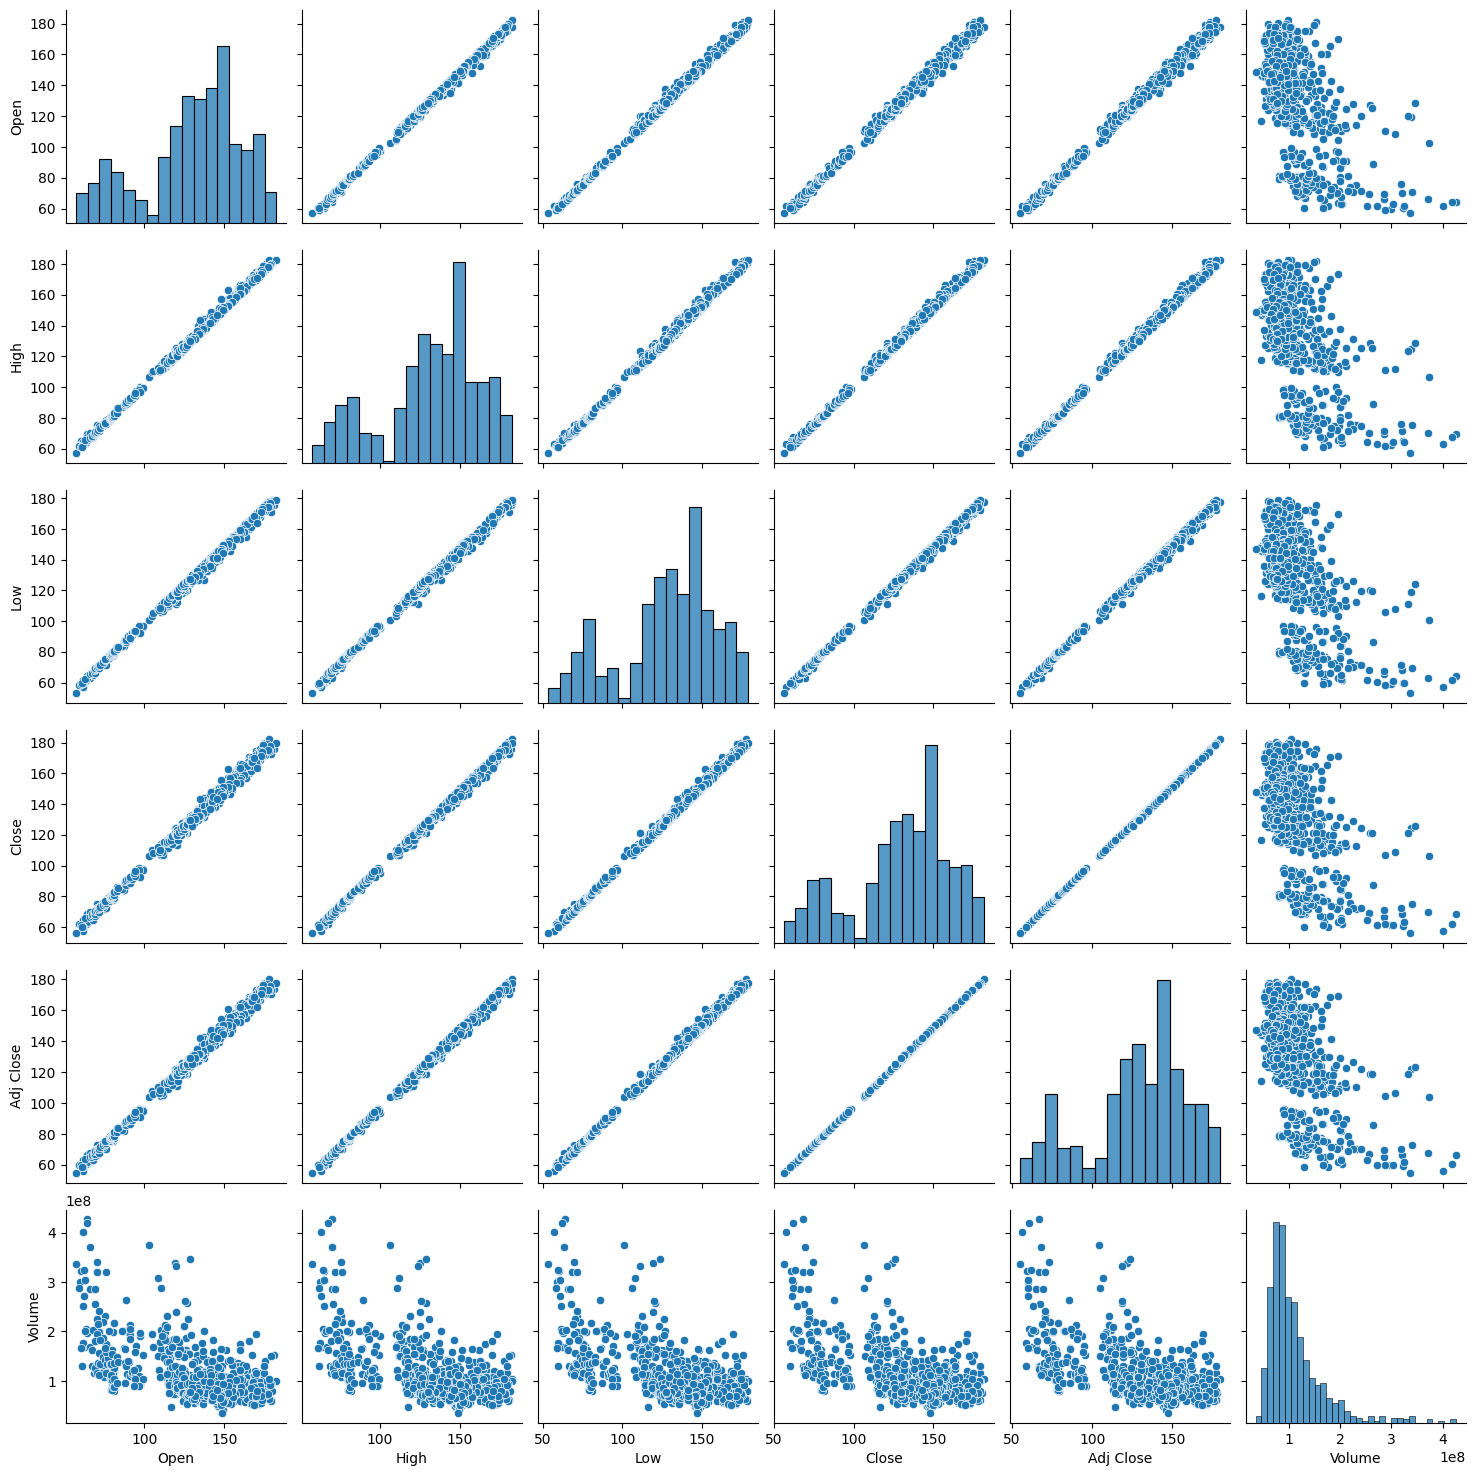

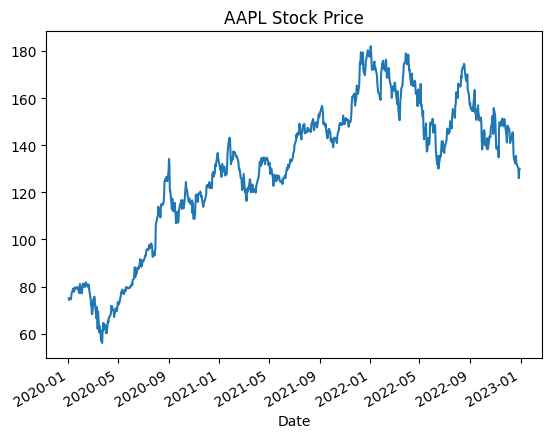

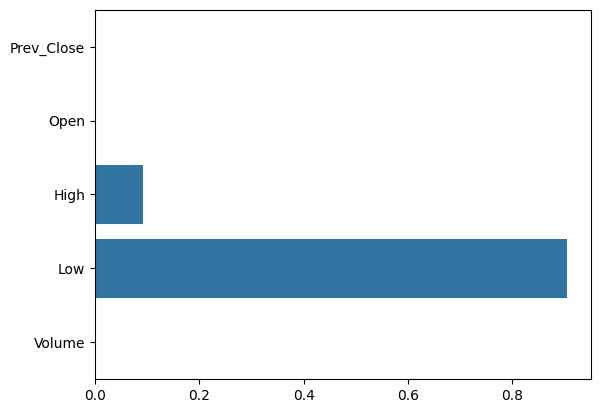

Linear Regression MAE: 0.7438339654089385
Decision Tree Regression MAE: 1.474387213094345


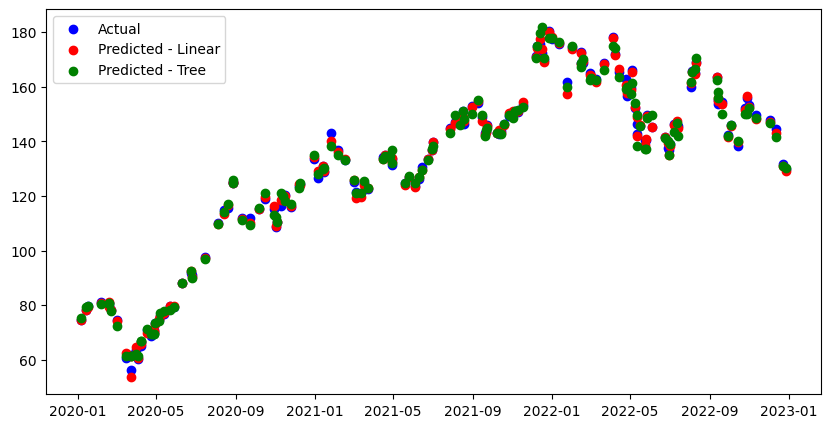

In [3]:
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Download and prepare the dataset
stock_symbol = 'AAPL'  # Apple Inc.
data = yf.download(stock_symbol, start="2020-01-01", end="2023-01-01")

# EDA
print(data.describe())
sns.pairplot(data)
plt.show()

data['Close'].plot(title=f"{stock_symbol} Stock Price")

plt.show()

# Predictive Modeling
# Feature engineering
data['Prev_Close'] = data['Close'].shift(1)
data = data.dropna()

# Select features and target
features = ['Prev_Close', 'Open', 'High', 'Low', 'Volume']  # Add more as needed
target = 'Close'

X = data[features]
y = data[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Decision Tree Regression model
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

# Predictions
y_pred_linear = linear_model.predict(X_test)
y_pred_tree = tree_model.predict(X_test)

# Feature Importance Analysis
feature_importance = tree_model.feature_importances_
sns.barplot(x=feature_importance, y=features)
plt.show()

# Model Evaluation Metrics
mae_linear = mean_absolute_error(y_test, y_pred_linear)
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

mae_tree = mean_absolute_error(y_test, y_pred_tree)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print(f"Linear Regression MAE: {mae_linear}")
print(f"Decision Tree Regression MAE: {mae_tree}")

# Visualize Predictions
plt.figure(figsize=(10,5))
plt.scatter(y_test.index, y_test, color='blue', label='Actual')
plt.scatter(y_test.index, y_pred_linear, color='red', label='Predicted - Linear')
plt.scatter(y_test.index, y_pred_tree, color='green', label='Predicted - Tree')
plt.legend()
plt.show()
